# 图像均值滤波

In [1]:
#coding:utf-8
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [3]:
#添加图像噪声
def salt(src,num):
    if type(src) == type(None):
        return None
    dst = src.copy()
    if len(src.shape) == 3 and src.shape[2] == 3:
        rows,cols,_ = src.shape
        for n in range(num):
            y = np.random.randint(rows - 1)
            x = np.random.randint(cols - 1)
            dst[y,x] = (255,255,255)
    elif len(src.shape) == 2:
        rows,cols = src.shape
        for n in range(num):
            y = np.random.randint(rows - 1)
            x = np.random.randint(cols - 1)
            dst[y,x] = 255
    else:
        return None
    
    return dst

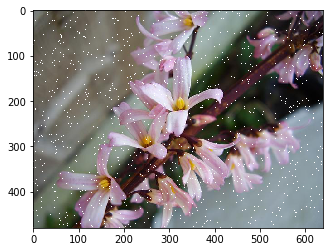

In [4]:
dst = salt(src,5000)
plt.imshow(dst)

In [5]:
def avg_gray_filter(img):
#     if type(src) == type(None) or len(src.shape) > 2:
#         return None
    src = np.float32(img)
    rows = src.shape[0]
    cols = src.shape[1]
    dst = np.zeros(src.shape,dtype=np.float64)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            pixel_r = np.float64(src[i, j,0] / 255.0 + src[i - 1, j - 1,0] / 255.0 + src[i - 1, j,0] / 255.0 + \
                    src[i, j - 1,0] / 255.0 +  src[i - 1, j + 1,0] / 255.0 + src[i + 1, j - 1,0] / 255.0 + \
                    src[i + 1, j + 1,0] / 255.0 + src[i, j + 1,0] / 255.0 +  src[i + 1, j,0] / 255.0)
            pixel_r = pixel_r *255 / 9.0
            
            if pixel_r > 255:
                pixel_r = 255
                
            dst[i,j,0] = pixel_r
            
            pixel_g = np.float64(src[i, j,1] / 255.0+ src[i - 1, j - 1,1]/ 255.0 + src[i - 1, j,1]/ 255.0 + \
                    src[i, j - 1,1]/ 255.0 +  src[i - 1, j + 1,1]/ 255.0 + src[i + 1, j - 1,1] / 255.0+ \
                    src[i + 1, j + 1,1]/ 255.0 + src[i, j + 1,1]/ 255.0 +  src[i + 1, j,1]/ 255.0)
            pixel_g = pixel_g * 255 / 9.0
            
            if pixel_g > 255:
                pixel_g = 255
                
            dst[i,j,1] = pixel_g
            
            pixel_b = np.float64(src[i, j,2]/ 255.0 + src[i - 1, j - 1,2]/ 255.0 + src[i - 1, j,2] / 255.0+ \
                    src[i, j - 1,2]/ 255.0 +  src[i - 1, j + 1,2]/ 255.0 + src[i + 1, j - 1,2] / 255.0+ \
                    src[i + 1, j + 1,2] / 255.0+ src[i, j + 1,2] / 255.0+  src[i + 1, j,2]/ 255.0)
            pixel_b = pixel_b * 255/ 9.0
            
            if pixel_b > 255:
                pixel_b = 255
                
            dst[i,j,2] = pixel_b
    
    return cv2.convertScaleAbs(dst)

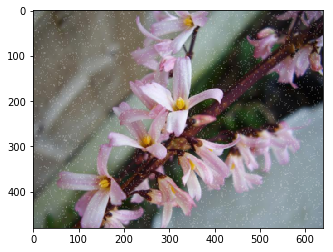

In [6]:
noise = salt(src,5000)
# channels = cv2.split(noise)
dst = avg_gray_filter(noise)
plt.imshow(dst)

参考：

[1]. https://blog.csdn.net/trent1985/article/details/44916989